# Pymaceutical Analysis
### 1. Out of the 4 treatments (Capomulin, Infubinol, Ketapril,  Placebo), only Capomulin showed consistent decrease in tumor volume over time [0-45 days].
### 2. Capomulin also showed the lowest number of cancer spreading sites in the same time period. Placebo showed the highest numbers.
### 3. Capomulin showed an average decrease of 19% in tumor volume over the 45 day period, the other 3 treatments had an increase of tumor volume almost 1.5 times of what it started with.

In [122]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

In [123]:
# Merge the two files together
p = os.path.join(os.getcwd()+'/pymaceutical data')
file1 = pd.read_csv(p+'/clinicaltrial_data.csv')
file2 = pd.read_csv(p+'/mouse_drug_data.csv')
file = file2.merge(file1, how = 'inner', on = 'Mouse ID')                                 # 1906 rows, 5 columns
# Only take ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
file = file[file['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
file_tumor = file.set_index('Drug', drop = True)[['Timepoint', 'Tumor Volume (mm3)']] 
file_tumor.sort_index(axis = 0, inplace = True)                                           # 777 rows, 2 columns
file_tumor.reset_index(inplace = True)

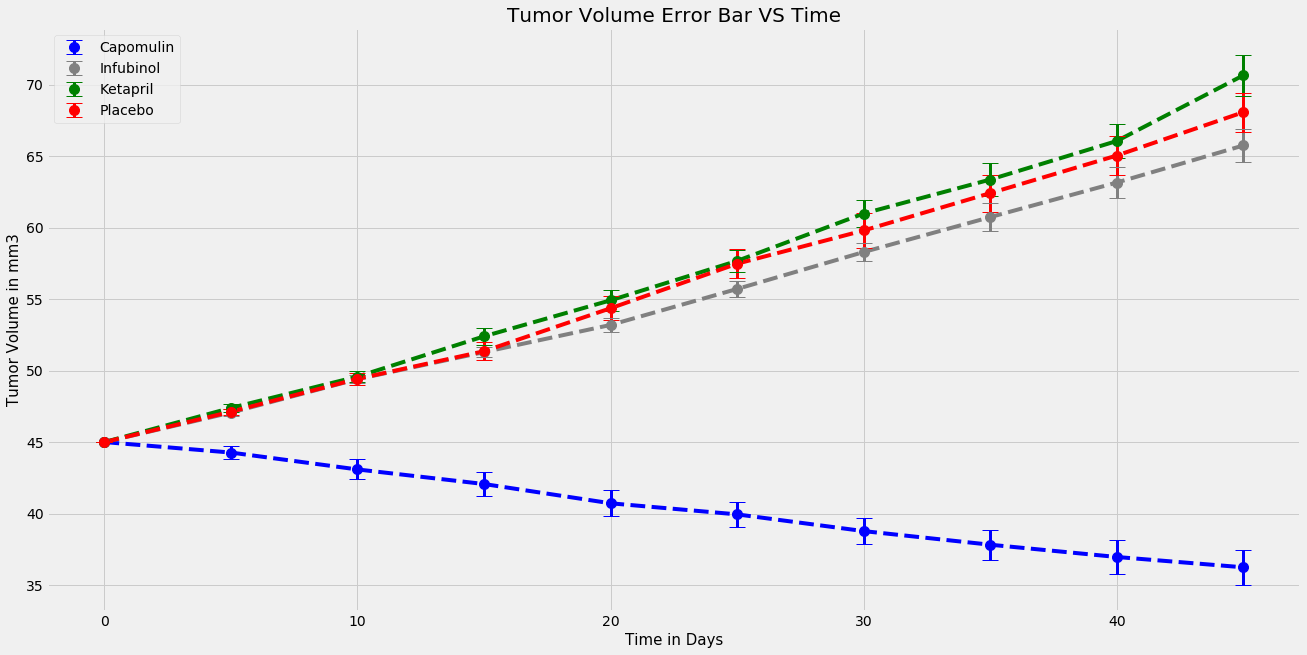

In [124]:
# Create Error Bars for the scatter plot above1
drugs = file_tumor.Drug.unique()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
c = ['blue', 'grey', 'green', 'red']
for i in range(len(drugs)):
    x = []
    y = []
    dat = file_tumor[file_tumor['Drug'] == drugs[i]]
    color = c[i]
    for j in range(len(dat['Timepoint'].unique())):
        datt = dat[dat['Timepoint'] == dat['Timepoint'].unique()[j]]
        e = datt['Tumor Volume (mm3)'].sem()
        mean = np.mean(datt['Tumor Volume (mm3)'])
        plt.errorbar(x = dat['Timepoint'].unique()[j], y = mean, yerr = e, label = drugs[i], color = color, \
                     fmt = 'o', markersize = 10, elinewidth = 3, capsize = 8)
        x.append(dat['Timepoint'].unique()[j])
        y.append(mean)
    x, y = zip(*sorted(zip(x, y)))
    plt.plot(x, y, color = color, linestyle = '--')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'best')
plt.xlabel('Time in Days', size = 15)
plt.ylabel('Tumor Volume in mm3', size = 15)
plt.title('Tumor Volume Error Bar VS Time', size = 20)
plt.show()

In [125]:
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment
file_meta = file.set_index('Drug', drop = True)[['Timepoint', 'Metastatic Sites']] 
file_meta.sort_index(axis = 0, inplace = True)                                          # 777 rows, 2 columns
file_meta.reset_index(inplace = True)

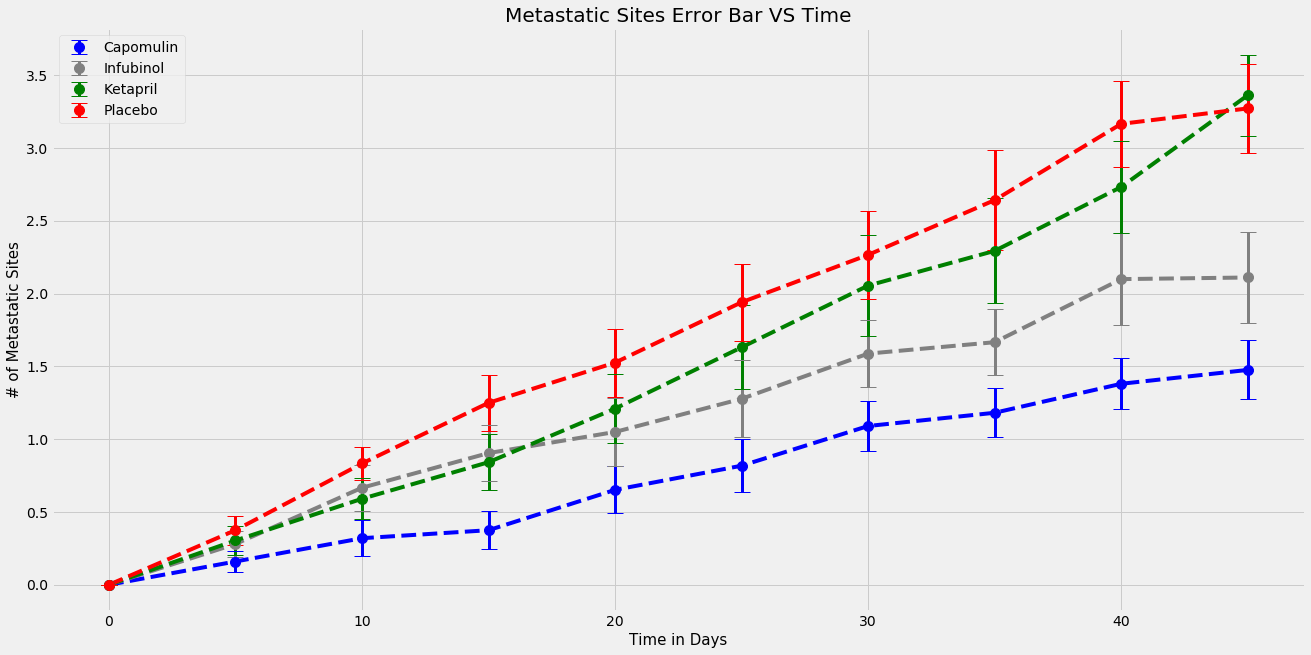

In [126]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
c = ['blue', 'grey', 'green', 'red']
for i in range(len(drugs)):
    x = []
    y = []
    dat = file_meta[file_meta['Drug'] == drugs[i]]
    color = c[i]
    dat.reset_index(drop = True, inplace = True)
    for j in range(len(dat['Timepoint'].unique())):
        datt = dat[dat['Timepoint'] == dat['Timepoint'].unique()[j]]
        e = datt['Metastatic Sites'].sem()
        mean = np.mean(datt['Metastatic Sites'])
        plt.errorbar(x = dat['Timepoint'].unique()[j], y = mean, yerr = e, label = drugs[i], color = color, \
                     fmt = 'o', markersize = 10, elinewidth = 3, capsize = 8)
        x.append(dat['Timepoint'].unique()[j])
        y.append(mean)
    x, y = zip(*sorted(zip(x, y)))
    plt.plot(x, y, color = color, linestyle = '--')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'best')
plt.xlabel('Time in Days', size = 15)
plt.ylabel('# of Metastatic Sites', size = 15)
plt.title('Metastatic Sites Error Bar VS Time', size = 20)
plt.show()

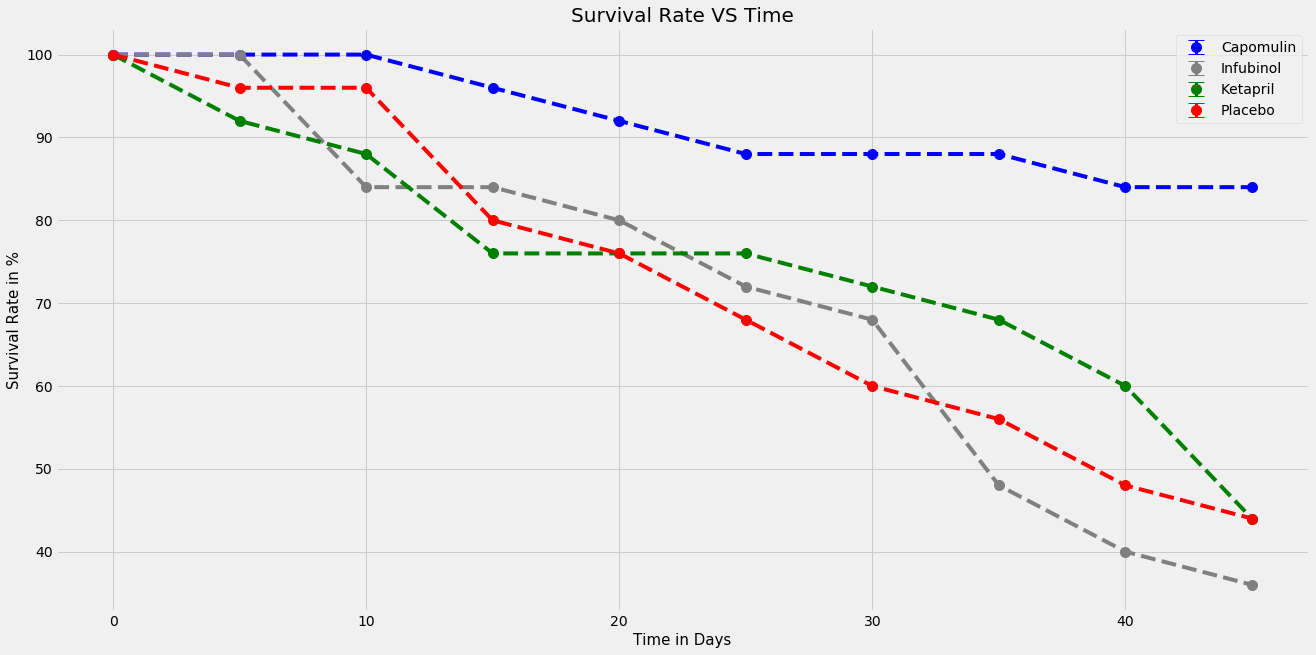

In [127]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
df = file.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().to_frame()
df.columns = ['# of Mouse Survived']
df['Survival Rate'] = (df['# of Mouse Survived'] / 25)*100
df.reset_index(inplace = True)

plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
c = ['blue', 'grey', 'green', 'red']
for i in range(len(drugs)):
    x = []
    y = []
    dat = df[df['Drug'] == drugs[i]]
    color = c[i]
    dat.reset_index(drop = True, inplace = True)
    for j in range(len(dat['Timepoint'].unique())):
        datt = dat[dat['Timepoint'] == dat['Timepoint'].unique()[j]]
        e = datt['Survival Rate'].sem()
        mean = np.mean(datt['Survival Rate'])
        plt.errorbar(x = dat['Timepoint'].unique()[j], y = mean, yerr = e, label = drugs[i], color = color, \
                     fmt = 'o', markersize = 10, elinewidth = 3, capsize = 8)
        x.append(dat['Timepoint'].unique()[j])
        y.append(mean)
    x, y = zip(*sorted(zip(x, y)))
    plt.plot(x, y, color = color, linestyle = '--')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'best')
plt.xlabel('Time in Days', size = 15)
plt.ylabel('Survival Rate in %', size = 15)
plt.title('Survival Rate VS Time', size = 20)
plt.show()

In [128]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days
size_change = []
file_subset = file[(file.Timepoint == 0) | (file.Timepoint == 45)]
for i in range(len(drugs)):
    dff = file_subset[file_subset.Drug == drugs[i]]
    dff.sort_values('Mouse ID', inplace = True)
    dff = dff[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
    # If no match, drop
    f1 = dff[dff.Timepoint == 0]
    f1.columns = ['Mouse ID', 'Timepoint0', 'Tumor Volume0']
    f2 = dff[dff.Timepoint == 45]
    f2.columns = ['Mouse ID', 'Timepoint45', 'Tumor Volume45']
    f = f1.merge(f2, how = 'left', on = 'Mouse ID').dropna().reset_index(drop = True)
    f['Change'] = ((f['Tumor Volume45'] - f['Tumor Volume0']) / f['Tumor Volume0'])*100
    size_change.append(f['Change'].mean())

C:\Users\meifl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


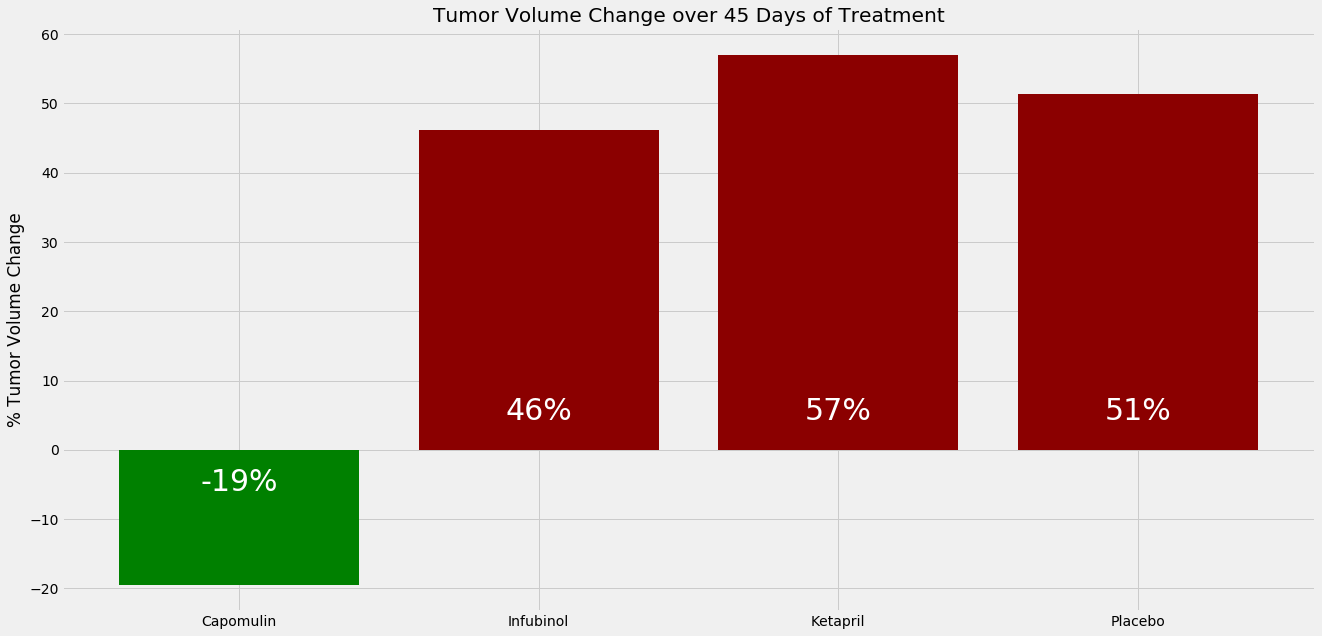

In [129]:
# Plot bar chart
color = []
for i in range(len(size_change)):
    if (size_change[i]) > 0:
        color.append('darkred')
    else:
        color.append('green')
xtick = np.arange(len(drugs))+1
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
ax = plt.bar(xtick, size_change, tick_label = drugs, color = color)
size = ['{0:.0f}%'.format(change) for change in size_change]

for i in range(len(size)):
    if (size_change[i] > 0):
        va = 'bottom'
        v = 3
    else:
        va = 'top'
        v = -3
    plt.annotate(size[i], (i+1, v), xytext = (0, 3), textcoords = 'offset points', ha = 'center', \
                 va = va, fontsize = 30, color = 'white')
    
plt.title('Tumor Volume Change over 45 Days of Treatment')
plt.ylabel('% Tumor Volume Change')
plt.show()